有以下几个部分：
1. 数据的初步分析
2. 数据可视化
3. 模型拟合
4. 调参

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_dataset.csv


In [2]:
import  matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_dataset.csv',header=0,sep=',')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10000 non-null  int64  
 1   Age                            10000 non-null  int64  
 2   Sex                            10000 non-null  object 
 3   Ethnicity                      10000 non-null  object 
 4   BMI                            10000 non-null  float64
 5   Waist_Circumference            10000 non-null  float64
 6   Fasting_Blood_Glucose          10000 non-null  float64
 7   HbA1c                          10000 non-null  float64
 8   Blood_Pressure_Systolic        10000 non-null  int64  
 9   Blood_Pressure_Diastolic       10000 non-null  int64  
 10  Cholesterol_Total              10000 non-null  float64
 11  Cholesterol_HDL                10000 non-null  float64
 12  Cholesterol_LDL                10000 non-null  

1. 最直观的发现 Alcohol_Consumption是有缺失值的，所以后续需要对缺失值进行处理
2. object，int64，float64三种数据类型
   


In [5]:
df.describe()

,Unnamed: 0,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories,Family_History_of_Diabetes,Previous_Gestational_Diabetes
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,44.620400,29.418150,94.79707,134.776210,9.507510,134.163700,89.558700,225.165540,55.019340,134.35377,55.16822,5.503430,2742.481900,0.507000,0.516500
std,2886.89568,14.343489,6.170866,14.38329,37.633544,3.176421,26.110317,17.237792,42.963744,14.537371,37.50238,25.88180,1.455091,716.643803,0.499976,0.499753
min,0.00000,20.000000,18.500000,70.00000,70.000000,4.000000,90.000000,60.000000,150.000000,30.000000,70.00000,10.00000,3.000000,1500.000000,0.000000,0.000000
25%,2499.75000,32.000000,24.100000,82.20000,102.175000,6.800000,112.000000,75.000000,187.875000,42.300000,101.67500,32.60000,4.200000,2129.000000,0.000000,0.000000
50%,4999.50000,45.000000,29.500000,94.90000,134.500000,9.500000,134.000000,89.000000,225.500000,55.200000,134.40000,55.45000,5.500000,2727.000000,1.000000,1.000000
75%,7499.25000,57.000000,34.700000,107.00000,167.800000,12.300000,157.000000,105.000000,262.400000,67.900000,166.40000,77.50000,6.800000,3368.000000,1.000000,1.000000
max,9999.00000,69.000000,40.000000,120.00000,200.000000,15.000000,179.000000,119.000000,300.000000,80.000000,200.00000,100.00000,8.000000,3999.000000,1.000000,1.000000


1. 首先Unnamed是没有用的，需要drop掉
2. 然后我们需要对数值类型的数据进行数据可视化
3. 而且最好我们对年龄进行一个group，因为这个跨度还是比较大的

In [6]:
df.head()

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


In [7]:
df=df.drop('Unnamed: 0',axis=1)

In [8]:
#这里使用众数对数据进行缺失值处理
mode_value=df['Alcohol_Consumption'].mode()[0]
df['Alcohol_Consumption']=df['Alcohol_Consumption'].fillna(mode_value)


In [9]:
#这里开始数据可视化先把所有的数值型数据找出来,然后先不动
numerical_data=df.select_dtypes(['int64','float64'])
numerical_data
categorical_data=df.select_dtypes(include=['object']).columns


通过查阅资料我们知道如何判断一个人是否有糖尿病的：
* ​​空腹血糖（Fasting Blood Glucose）​​
* ​​≥126 mg/dL​​（两次检测） → 提示糖尿病。
* ​​糖化血红蛋白（HbA1c）​​
* ​​≥6.5%​​ → 可作为糖尿病诊断标准
* 所以我们就把Fasting Blood Glucose≥126 mg/dL的人定为患有糖尿病
* （这是不对的，根据后面的模型，发现如果把这个当成是否糖尿病的指标会导致出现欠拟合的情况，决策树：0.56，随机森林：0.5655，逻辑回归：0.57接近随机猜测，明显不对）
* 于是，我们调整指标选取，选取这两个特征作为指标，初步发现模型的拟合程度大幅度升高（其中决策树：0.89，随机森林：0.9095）
* 通过修正标签定义，实际上完成了两件事：
    1. ​​数据质量提升​​：减少误标，增强特征-目标关联.
    2. ​​模型适配优化​​：树模型天然适合处理阈值型医学标准。


In [10]:
#我们需要观察一下患病情况
#
df['Diabetes'] = np.where(
    (df['Fasting_Blood_Glucose'] >= 126) | (df['HbA1c'] >= 6.5), 1, 0
)

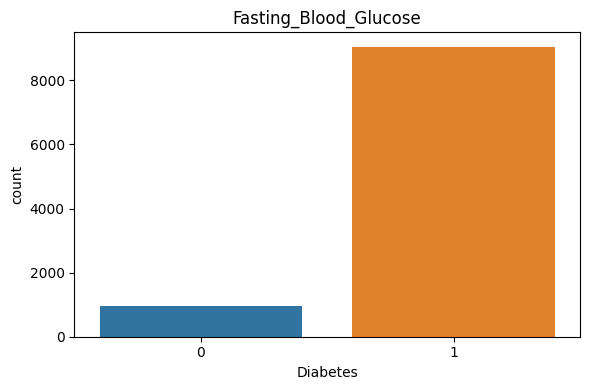

In [11]:
#绘图
plt.figure(figsize=(6,4))
sns.countplot(
    x='Diabetes',
    data=df
)
plt.title('Fasting_Blood_Glucose')
plt.tight_layout()

In [12]:
#以下就是特征工程这里我们写一个函数来讲所有的数值型数据进行处理,这里借鉴一位大佬的写法
def numerical_distro(data,numerical_features):


    for feature in numerical_features:
        plt.figure(figsize=(12,5))

        #histogram with kde
        plt.subplot(1,2,1)
        sns.histplot(data=data,x=data[feature],kde=True,bins=30)
        plt.xlabel(feature)
        plt.ylabel("Frequency")

        #box plot 
        plt.subplot(1,2,2)
        sns.boxplot(data[feature])
        plt.title(f"Box Plot of  { feature } ")
        plt.tight_layout()
        plt.show()
        # Additional statistics
        print(f"\nStatistics for {feature}:")
        print(f"Skewness: {data[feature].skew():.2f}")
        print(f"Missing Values: {data[feature].isnull().sum()}")

     

In [13]:
def categorical_distro(data, categorical_features, top_n=10):
    for feature in categorical_features:
        s = data[feature]
        unique_count = s.nunique()
        counts = s.value_counts()

        # 处理类别数量并设置标题
        if unique_count > top_n:
            counts = counts.nlargest(top_n)
            print(f"Top {top_n} Categories of {feature}")
        else:
            plt.title(f"Distribution of {feature}")

        # 统一绘图逻辑
        sns.barplot(x=counts.index,
                    y=counts.values,
                    palette='pastel',    
                    hue=counts.index,) 
        
        # 统一设置图表属性
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

        # 统一统计信息输出
        print(f"Feature: {feature}")
        print(f"Number of Unique Values: {unique_count}")
        print(f"Missing Values: {s.isnull().sum()}\n")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


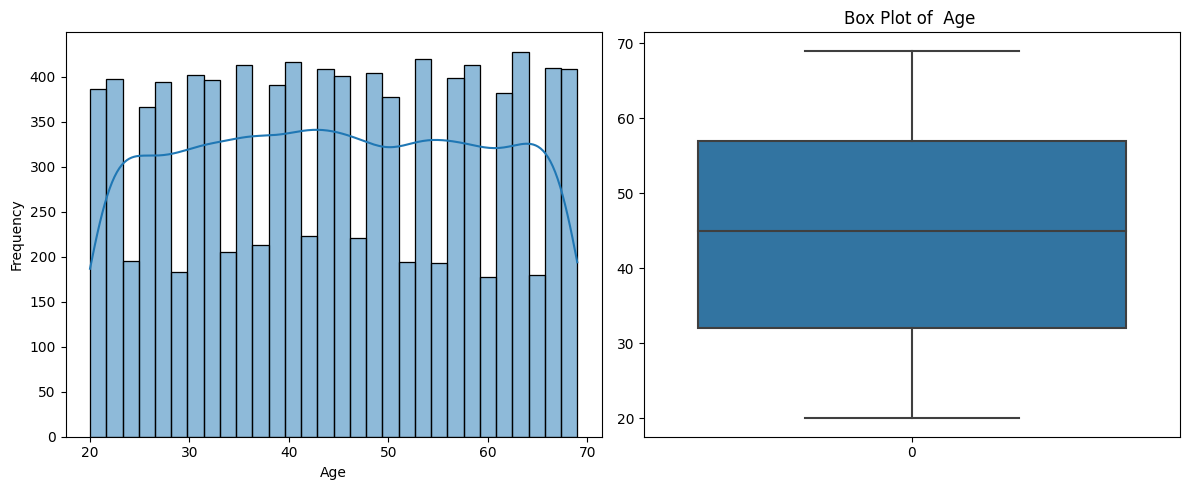


Statistics for Age:
Skewness: -0.00
Missing Values: 0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


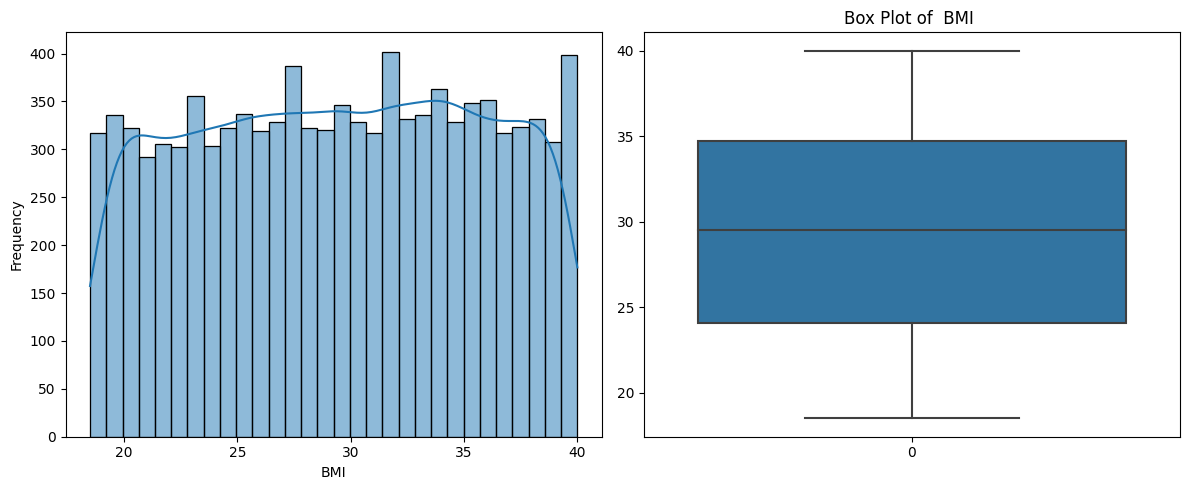


Statistics for BMI:
Skewness: -0.03
Missing Values: 0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


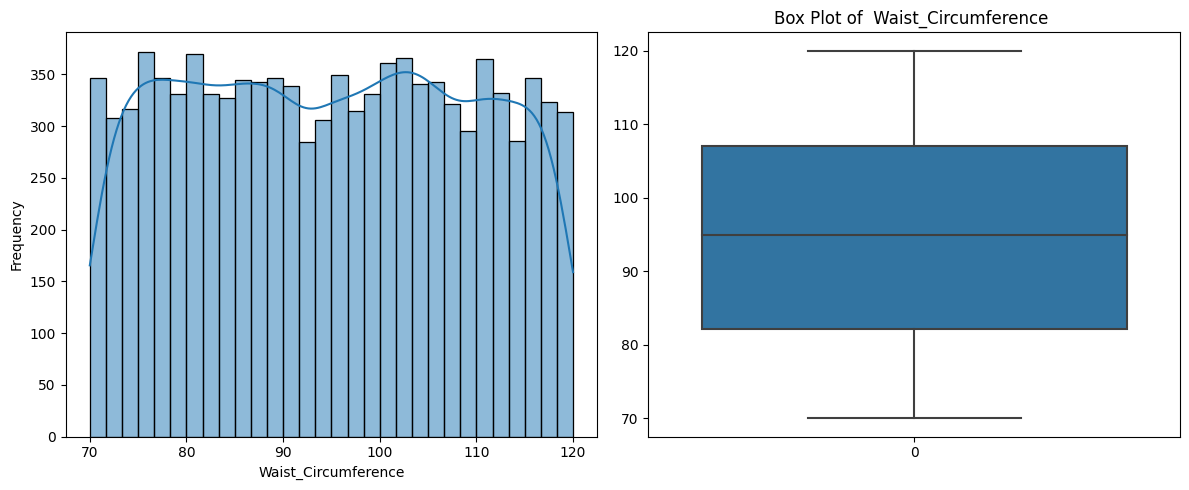


Statistics for Waist_Circumference:
Skewness: 0.01
Missing Values: 0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


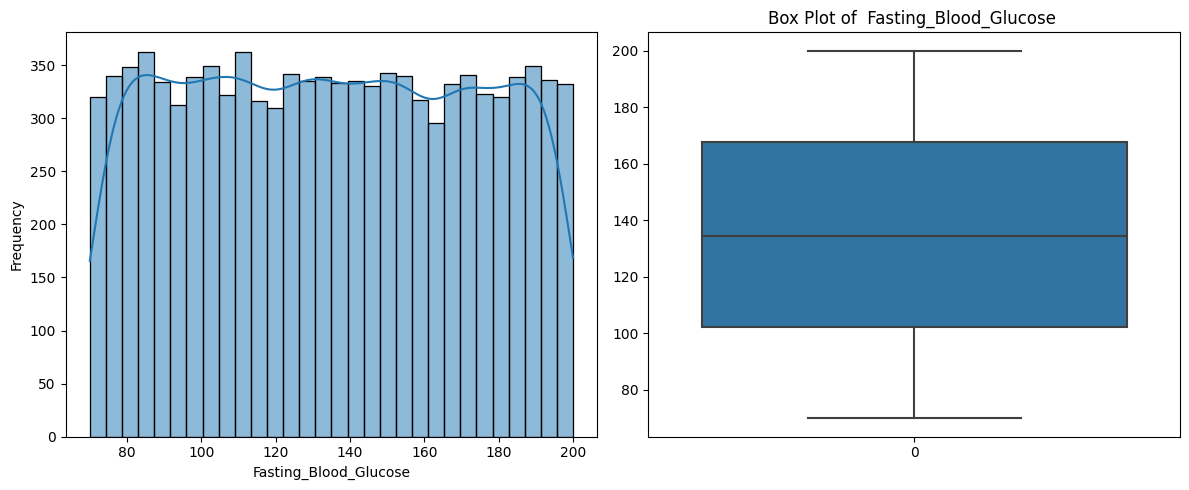


Statistics for Fasting_Blood_Glucose:
Skewness: 0.01
Missing Values: 0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


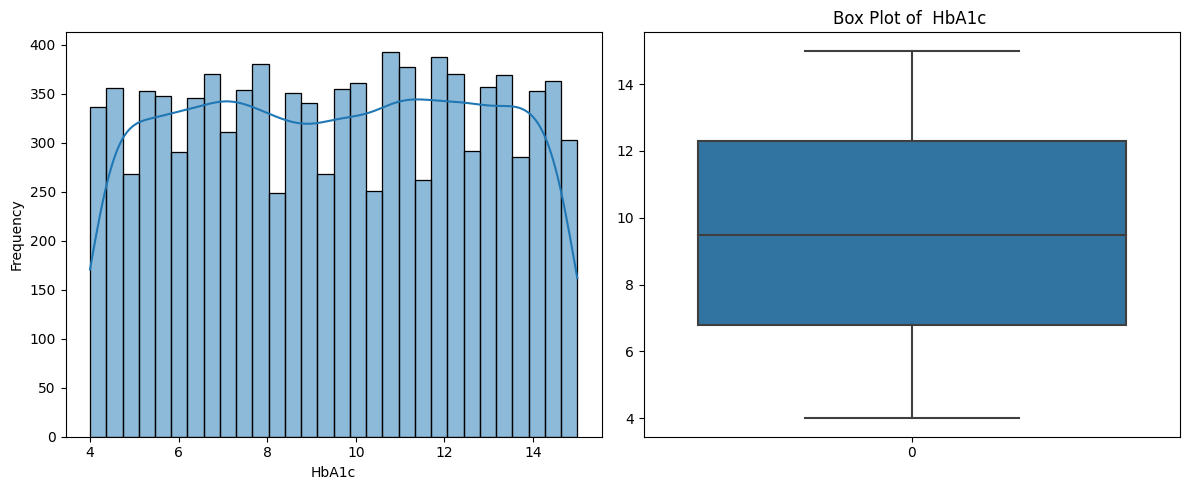


Statistics for HbA1c:
Skewness: -0.01
Missing Values: 0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


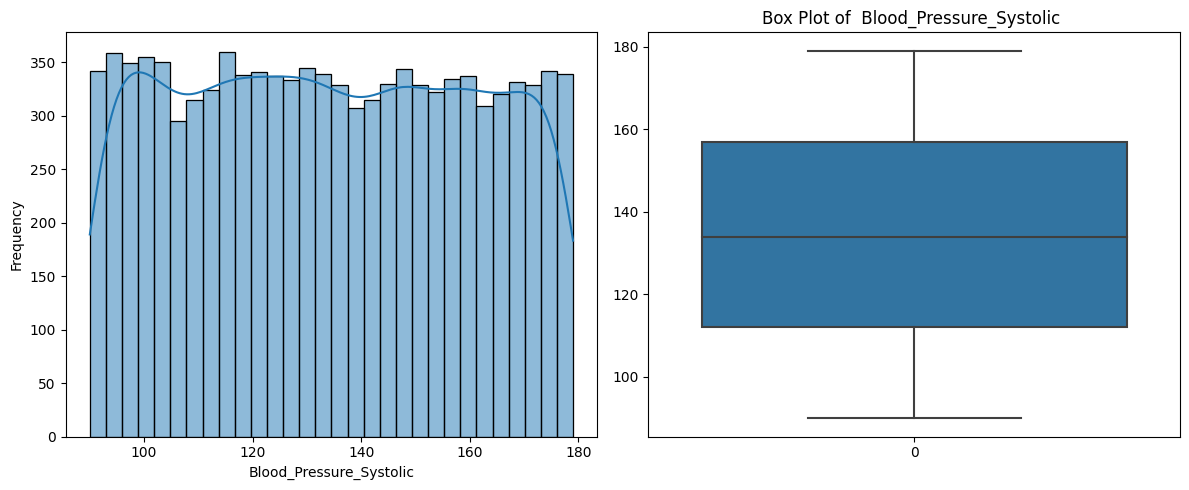


Statistics for Blood_Pressure_Systolic:
Skewness: 0.02
Missing Values: 0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


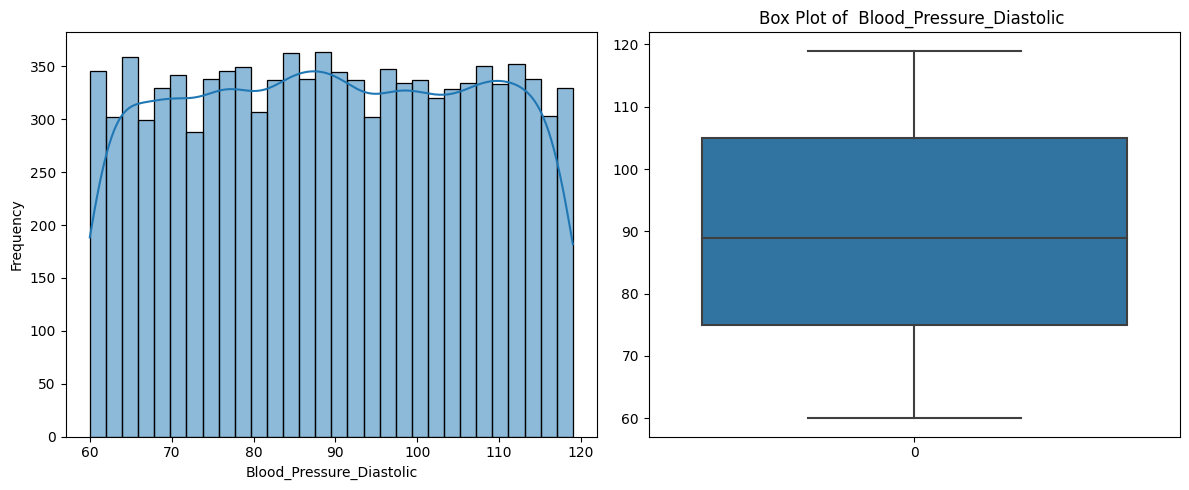


Statistics for Blood_Pressure_Diastolic:
Skewness: -0.01
Missing Values: 0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


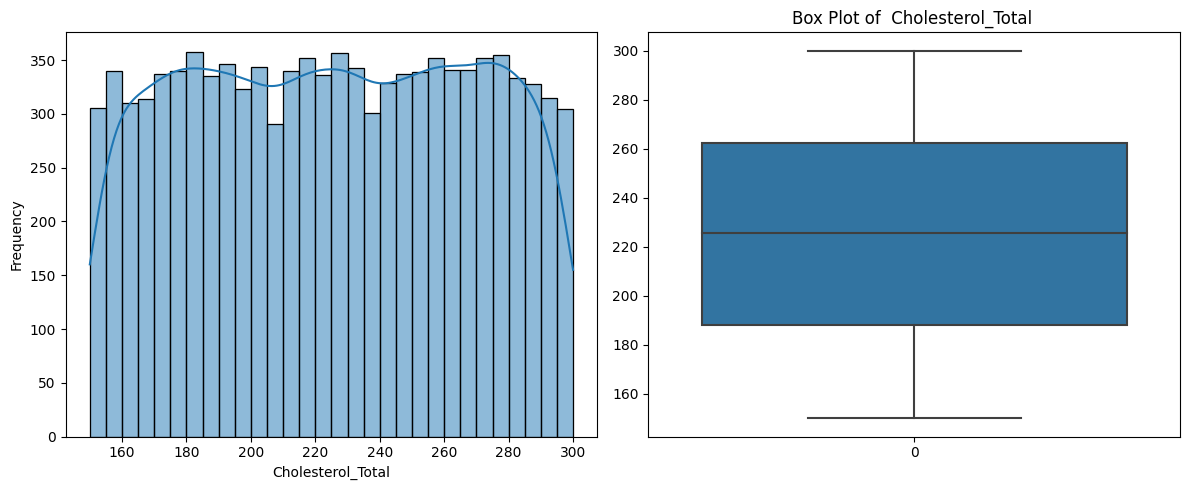


Statistics for Cholesterol_Total:
Skewness: -0.01
Missing Values: 0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


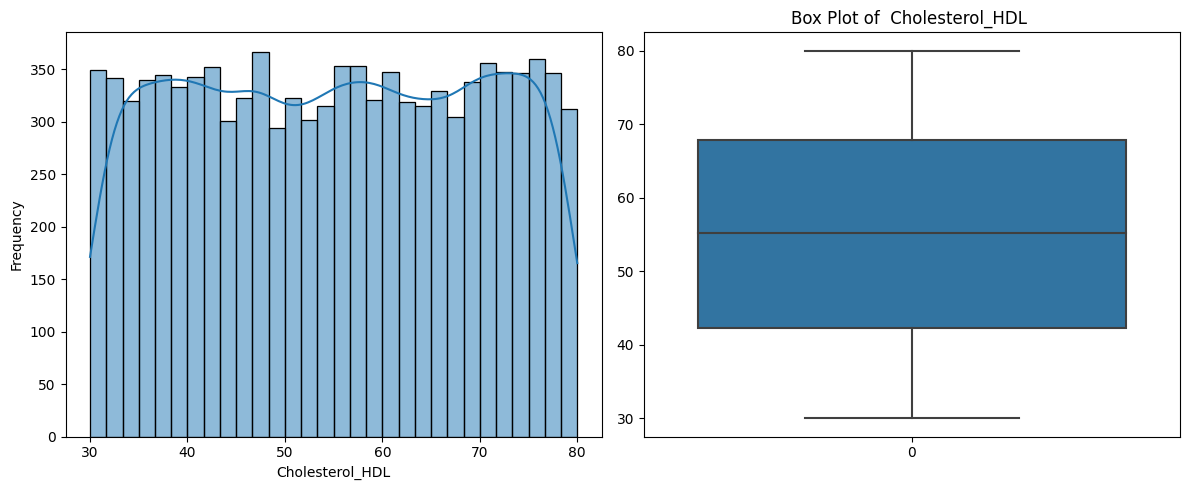


Statistics for Cholesterol_HDL:
Skewness: -0.01
Missing Values: 0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


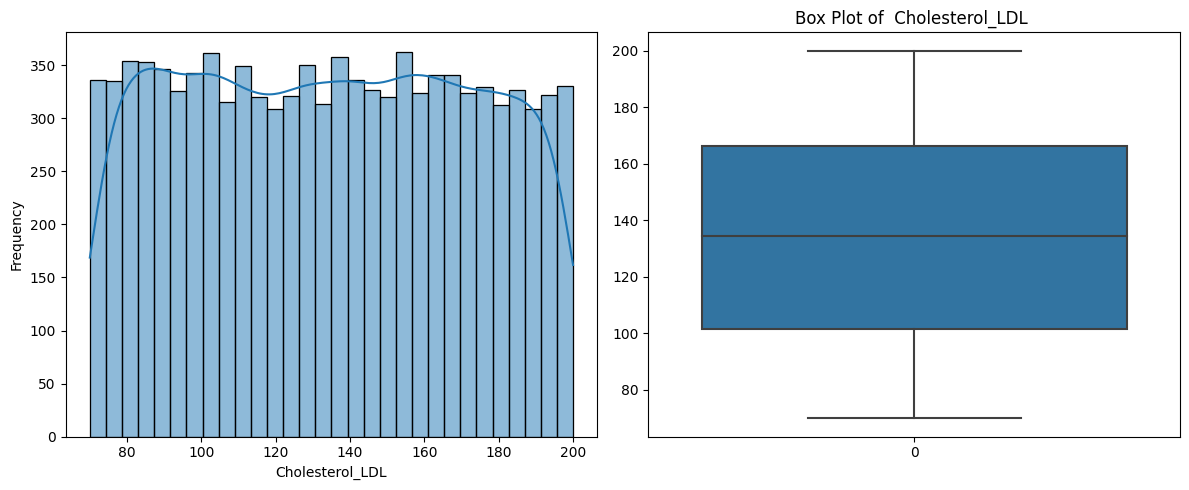


Statistics for Cholesterol_LDL:
Skewness: 0.02
Missing Values: 0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


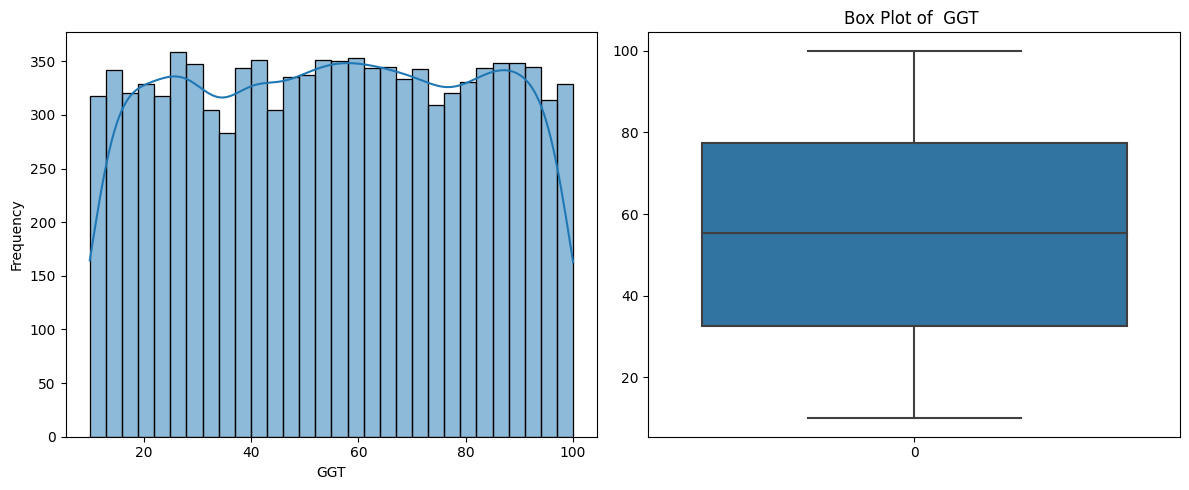


Statistics for GGT:
Skewness: -0.01
Missing Values: 0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


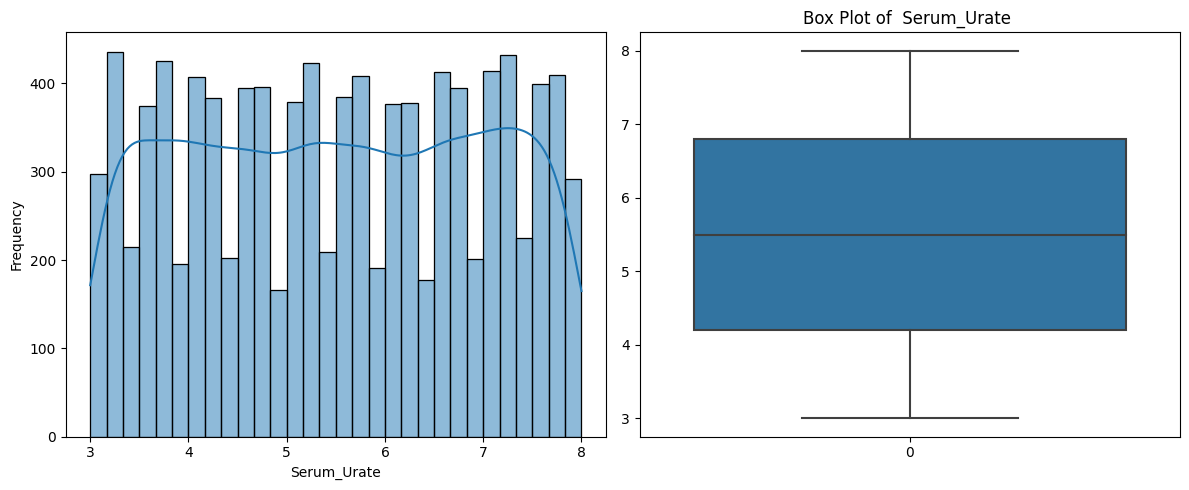


Statistics for Serum_Urate:
Skewness: -0.01
Missing Values: 0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


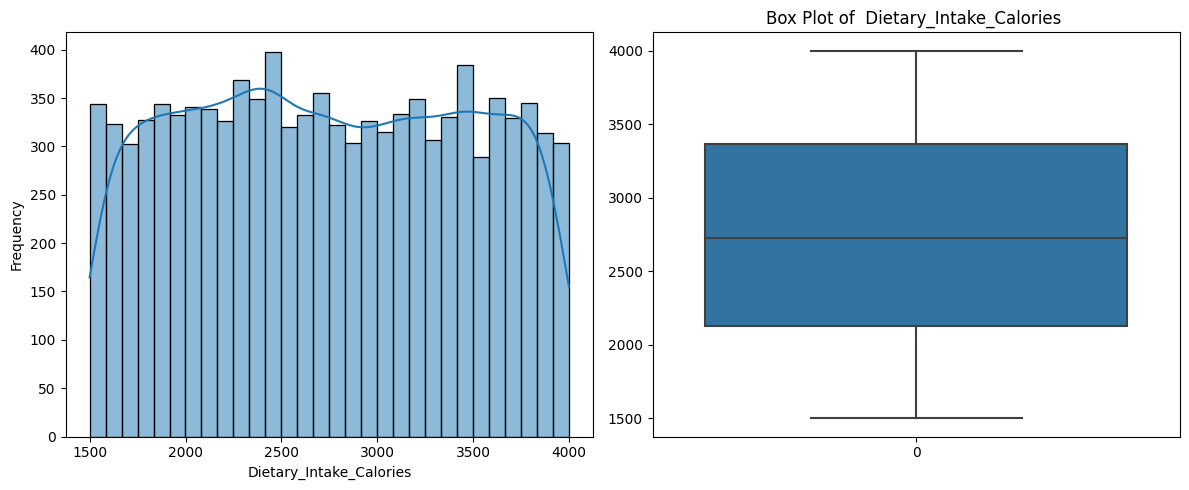


Statistics for Dietary_Intake_Calories:
Skewness: 0.02
Missing Values: 0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


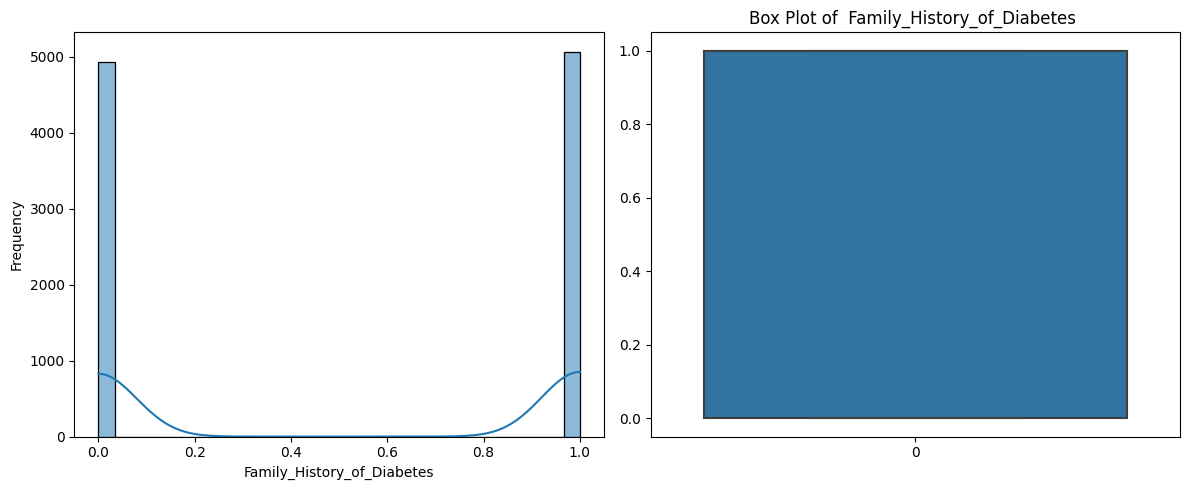


Statistics for Family_History_of_Diabetes:
Skewness: -0.03
Missing Values: 0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


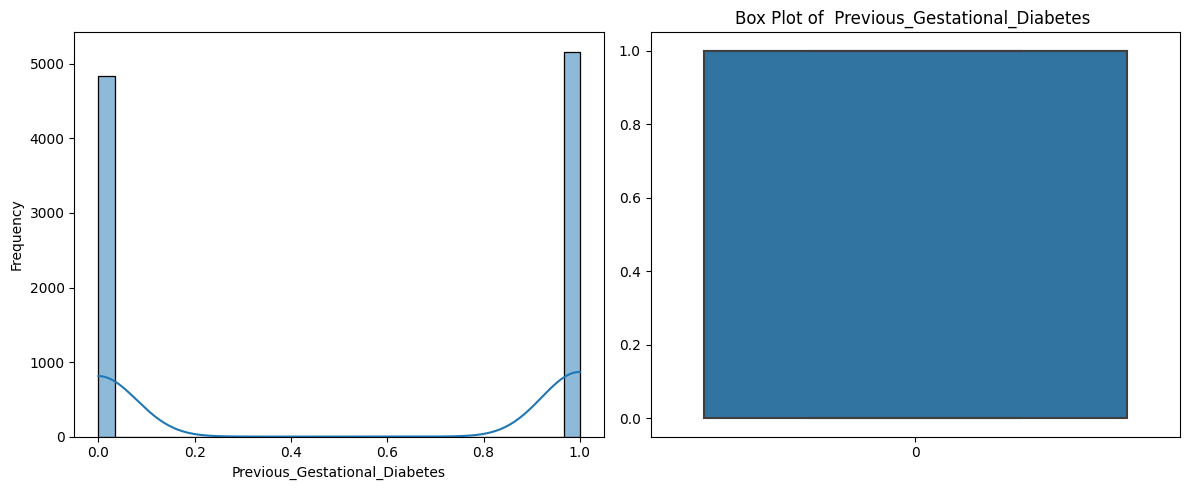


Statistics for Previous_Gestational_Diabetes:
Skewness: -0.07
Missing Values: 0


In [14]:
numerical_distro(df,numerical_data)


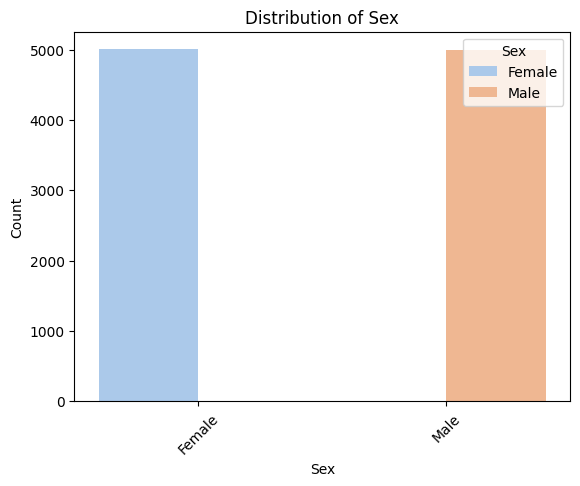

Feature: Sex
Number of Unique Values: 2
Missing Values: 0



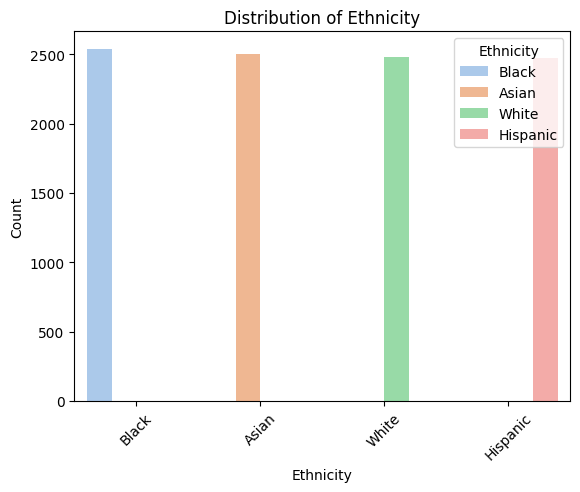

Feature: Ethnicity
Number of Unique Values: 4
Missing Values: 0



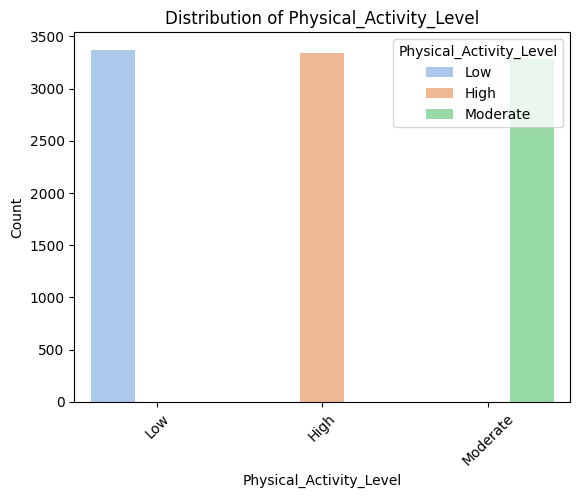

Feature: Physical_Activity_Level
Number of Unique Values: 3
Missing Values: 0



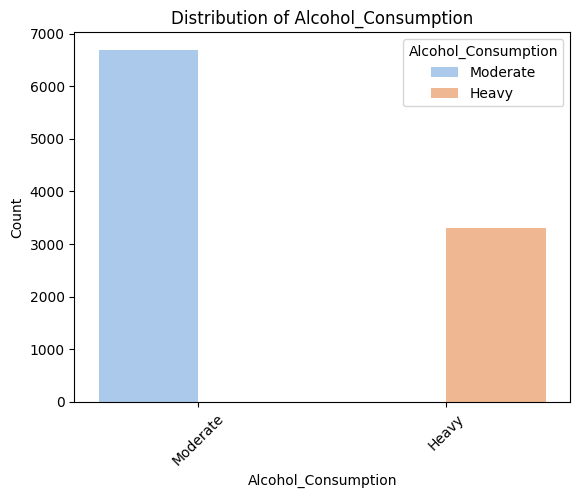

Feature: Alcohol_Consumption
Number of Unique Values: 2
Missing Values: 0



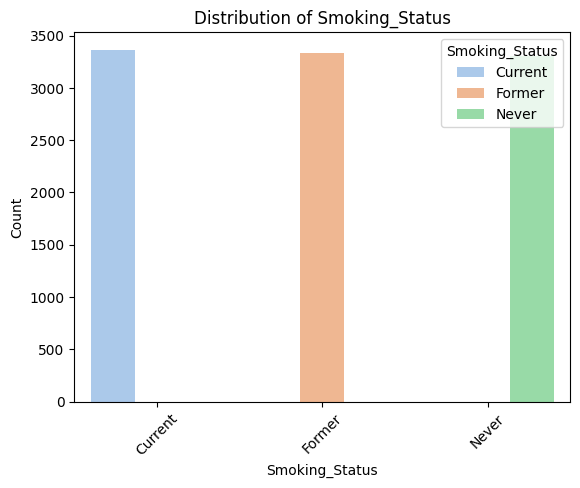

Feature: Smoking_Status
Number of Unique Values: 3
Missing Values: 0



In [15]:
categorical_distro(df,categorical_data)

针对糖尿病风险预测这类结构化表格数据问题（包含混合数值型和分类变量），以下是常用的机器学习算法分类及适用场景建议：

### 一、基础算法（适合快速验证）
1. **逻辑回归**
   - 适用场景：二分类问题（如预测是否患病）
   - 优势：可解释性强，适合小数据集
   - 注意：需对分类变量进行编码，处理共线性

2. **决策树**
   - 适用场景：特征重要性分析
   - 优势：自动处理混合数据类型，可视化解释
   - 示例：`DecisionTreeClassifier(max_depth=3)`

### 二、集成方法（推荐优先尝试）
3. **随机森林**
   - 适用场景：多数表格数据问题
   - 优势：抗过拟合，自动处理缺失值（需配置参数）
   - 改进：使用`class_weight`处理类别不平衡

4. **梯度提升树**
   - XGBoost/LightGBM/CatBoost
   - 适用场景：中小型结构化数据
   - 优势：自动处理类别变量（如CatBoost），竞赛常用

5. **Stacking集成**
   - 适用场景：追求最优性能
   - 示例组合：逻辑回归 + SVM + 随机森林 作为基模型

### 三、进阶算法
6. **神经网络**
   - 推荐架构：TabNet（Google Research）
   - 优势：自动特征交叉，适合复杂关系
   - 注意：需要足够数据量（建议>1000样本时使用）

7. **贝叶斯网络**
   - 适用场景：需要概率解释的医学场景
   - 优势：处理不确定性，发现变量间依赖关系

### 四、特殊场景处理
8. **生存分析（Survival Analysis）**
   - 适用场景：预测糖尿病发病时间
   - 推荐：Cox比例风险模型

9. **不平衡数据处理**
   - 方法：SMOTE过采样 + EasyEnsemble
   - 工具：`imbalanced-learn`库

### 五、特征工程建议
1. **医学特异性处理**：
   - 创建组合指标：BMI × 血糖水平
   - 时序特征：血糖变化趋势（如果有时间维度）

2. **分类变量优化**：
   ```python
   # 基于医学知识的手工编码示例
   data['obesity_level'] = pd.cut(data['BMI'], 
                                bins=[0, 18.5, 25, 30, 100],
                                labels=['under', 'normal', 'over', 'obese'])
   ```

### 六、验证策略（关键！）
针对小样本数据（n=152）：
```python
from sklearn.model_selection import StratifiedRepeatedKFold
cv = StratifiedRepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
```

### 七、可解释性工具
1. SHAP值分析：
   ```python
   import shap
   explainer = shap.TreeExplainer(model)
   shap_values = explainer.shap_values(X_test)
   ```

2. 临床决策规则提取：
   ```python
   from sklearn.tree import export_text
   print(export_text(model, feature_names=list(X.columns)))
   ```

### 八、算法选择流程图
```
小样本数据 (n<1000) → 随机森林/XGBoost → 特征分析 → 逻辑回归（简化模型）
                             ↓
临床可解释性要求高 → 决策树/贝叶斯网络
                             ↓
需要概率输出 → 带校准的SVM/Platt Scaling
```

### 九、医疗领域特殊考量
1. **误诊代价分析**：
   - 设置差异化的代价敏感学习权重
   - 示例：假阴性（漏诊）代价设为假阳性代价的5倍

2. **合规性处理**：
   - 使用`AIX360`工具包生成符合监管要求的解释报告
   - 保留完整的特征处理可追溯链条

建议从随机森林开始建立baseline，再通过特征重要性分析筛选关键变量，最后用逻辑回归构建可解释的简化模型。若追求最高准确率，可尝试LightGBM+SHAP解释的组合。

模型准确率: 0.89


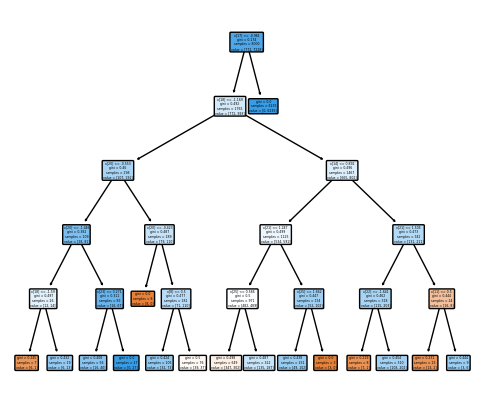

In [16]:
from time import process_time, process_time_ns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X = df.drop(['Diabetes', 'Fasting_Blood_Glucose'], axis=1)
y = df['Diabetes']
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 关键修复1：正确识别列类型 ---
# 获取分类列名（所有 object 类型列）
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# 获取数值列名（排除分类列后的 int/float 列）
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col not in categorical_columns]

# --- 关键修复2：创建预处理管道 ---
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),  # 分类列独热编码
        ('num', StandardScaler(), numerical_columns)    # 数值列标准化
    ],
    remainder='passthrough'
)

# 应用预处理（仅在训练集使用 fit_transform）
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)  # 测试集使用相同转换器

# --- 关键修复3：删除对 y 的错误操作 ---
# 直接使用原始标签，无需处理

# 训练模型
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

# 评估模型
score = clf.score(X_test, y_test)
print(f"模型准确率: {score:.2f}")
from  sklearn.tree import  plot_tree
plt.figure(figsize=(6,5))
plot_tree(
    clf,
    rounded=True,
    filled=True
)
plt.show()

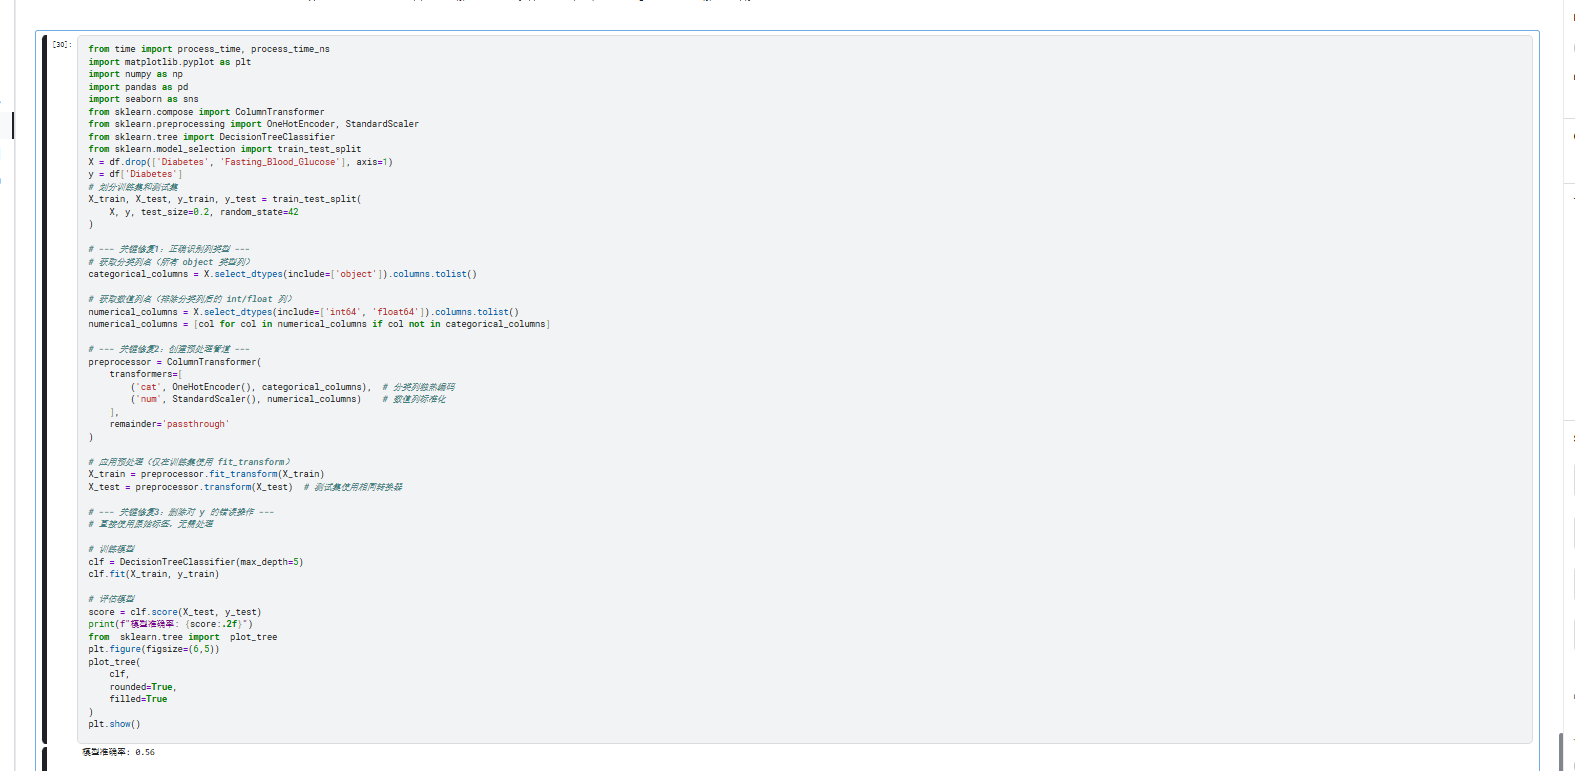欠拟合，所以需要改变策略，尝试使用XGboost看看拟合情况，在根据这些对模型进行进一步修改


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=5)
rf.fit(X_train, y_train)
print("随机森林准确率:", rf.score(X_test, y_test))

随机森林准确率: 0.9095


* # 逻辑回归

In [18]:
from time import process_time, process_time_ns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc
X = df.drop(['Diabetes', 'Fasting_Blood_Glucose'], axis=1)
y = df['Diabetes']
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 关键修复1：正确识别列类型 ---
# 获取分类列名（所有 object 类型列）
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# 获取数值列名（排除分类列后的 int/float 列）
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col not in categorical_columns]

# --- 关键修复2：创建预处理管道 ---
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),  # 分类列独热编码
        ('num', StandardScaler(), numerical_columns)    # 数值列标准化
    ],
    remainder='passthrough'
)

# 应用预处理（仅在训练集使用 fit_transform）
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)  # 测试集使用相同转换器
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print(f'Accuracy of Logistic Regression model: {acc:.2f}')

Accuracy of Logistic Regression model: 0.89
